In [1]:
import pandas as pd
import matplotlib
import numpy as np
import numpy.linalg as LA
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import Lib.TaggedRowVecs as trv
import Lib.TrvPlot as trvPlt
np.core.arrayprint._line_width = 160
%matplotlib inline

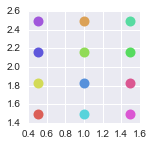

In [2]:
l2 = trv.d2Lattice(steps1=3, steps2=4)
resl2 = trvPlt.PlotTrvs(l2, figsize=(2,2))

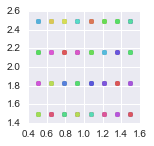

In [3]:
l3 = trv.d3Lattice(steps1=8, steps2=4, steps3=6)
resl3 = trvPlt.PlotTrvs(l3, figsize=(2,2), markersize=5)

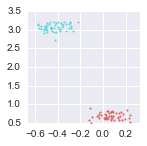

In [4]:
q = trv.Gaussians()
tcvG = trv.Gaussians(center=q, 
                     num_points=50,
                     covMatrix=np.matrix(np.diag([.01] * 2)))
resG = trvPlt.PlotTrvs(tcvG, figsize=(2,2), markersize=2, tag_extractor=lambda x: x[0])

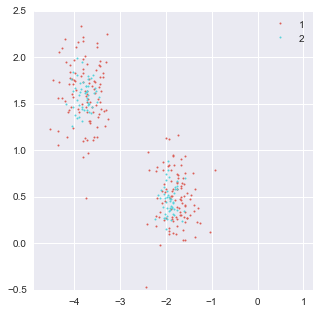

In [16]:
q = trv.Gaussians(covMatrix=np.matrix(np.diag([5.] * 2)))
tcvG = trv.GaussianTwins(center=q, num_points1=100, num_points2=50)
resG = trvPlt.PlotTrvs(tcvG, figsize=(5,5), 
                       markersize=2, tag_extractor=lambda x: x[0],
                       showLegend=True)

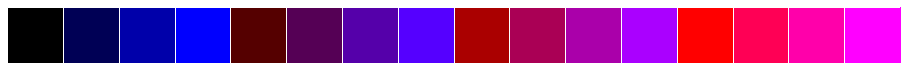

In [11]:
sp = 4
cr = trvPlt.MakeRedBlueGridColorer(span_x=sp, span_y=sp)
clrs = [cr((x, y)) for x in range(sp) for y in range(sp)]
sns.palplot(clrs)